# Практика по Conv2D

In [2]:
import tensorflow as tf
import numpy as np
#tf.enable_eager_execution()
from tensorflow.keras.layers import Conv2D
from skimage import data
import matplotlib.pyplot as plt

(1, 512, 512, 1)


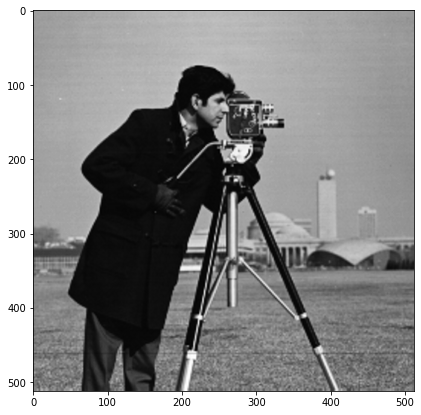

In [16]:
image = data.camera()
plt.figure(figsize=(7, 7))
plt.imshow(image, cmap="gray")
image = image[None, ..., None].astype(np.float32) / 255.
print(image.shape)

## Практическое задание 1

Реализуйте фильтр для детектирования вертикальных линий. Размер изображения не должен измениться.

[[[[-1.8470589e+00]
   [-4.3137193e-02]
   [-1.9607842e-02]
   ...
   [-1.1764705e-02]
   [ 5.9604645e-08]
   [ 1.7882354e+00]]

  [[-2.4627452e+00]
   [-3.1372547e-02]
   [-1.1764705e-02]
   ...
   [-7.8431964e-03]
   [ 0.0000000e+00]
   [ 2.3843138e+00]]

  [[-2.4627452e+00]
   [ 2.7451038e-02]
   [ 1.5686333e-02]
   ...
   [ 1.5686333e-02]
   [ 3.9216280e-03]
   [ 2.3843138e+00]]

  ...

  [[-1.9294118e+00]
   [-1.1372545e-01]
   [-5.4901987e-02]
   ...
   [ 2.8627458e-01]
   [ 1.7254904e-01]
   [ 1.7686274e+00]]

  [[-1.9294118e+00]
   [-7.8431398e-02]
   [-4.7058851e-02]
   ...
   [ 2.6666680e-01]
   [ 1.5686277e-01]
   [ 1.7725490e+00]]

  [[-1.4470588e+00]
   [-5.8823556e-02]
   [-3.5294145e-02]
   ...
   [ 2.0000005e-01]
   [ 1.1764708e-01]
   [ 1.3294117e+00]]]]
Input shape (1, 512, 512, 1). Output shape (1, 512, 512, 1)
Tests passed


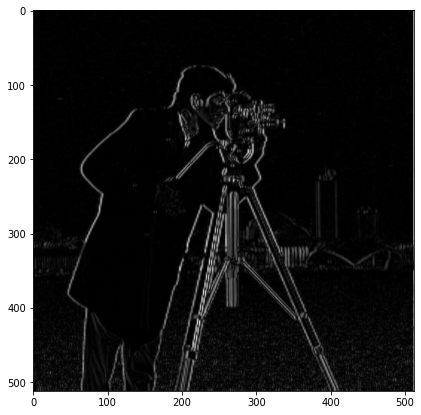

In [17]:
# < YOUR CODE STARTS HERE >
# 1. определите слой conv_layer так чтобы размер выходного изображения не изменился
# 2. примените его к image для инициализации
# 3. определите kernel = [[1, 0, -1], [2, 0, -2], [1, 0, -1]] . 
# 4. не забудьте задать ему правильный размер
# 5. conv_layer.set_weights([kernel])
# После этого вы получите изображение с задетектированными линиями
conv_layer = Conv2D(kernel_size=(3, 3), filters=1, use_bias=False, padding="same")
_ = conv_layer(image)

kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

kernel = kernel.reshape((3, 3, 1, 1))
conv_layer.set_weights([kernel])
# < YOUR CODE ENDS HERE >
detected_lines = conv_layer(image)
print(detected_lines.numpy())
plt.figure(figsize=(7, 7))
plt.imshow(np.abs(detected_lines.numpy()[0, :,:, 0]), cmap="gray")
print(f"Input shape {image.shape}. Output shape {conv_layer(image).numpy().shape}")
assert image.shape  == detected_lines.shape
print("Tests passed")

## Практическое задание 2

Реализуйте свертку, которая повысит резкость цветного изображения и не изменит его размер.

Это делается с помощью такого фильтра:



```
[[0, -1, 0], 
[-1, 5, -1], 
[0, -1, 0]]
```



(1, 400, 600, 3)


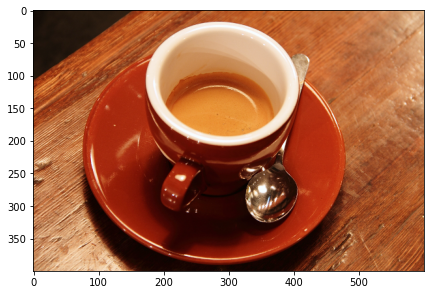

In [20]:
image = data.coffee()
plt.figure(figsize=(7, 7))
plt.imshow(image, cmap="gray")
image = image[None, ...].astype(np.float32) / 255.
print(image.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Input shape (1, 400, 600, 3). Output shape (1, 400, 600, 3)
Tests passed


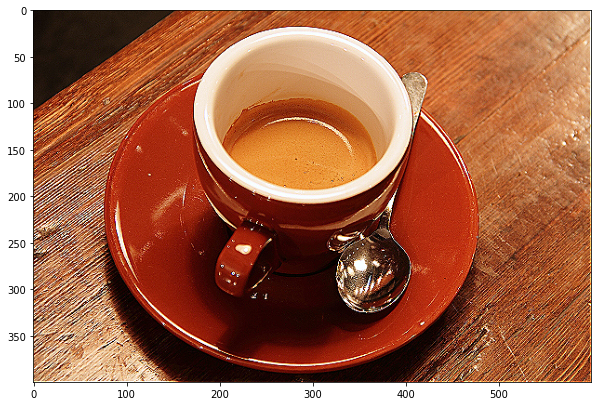

In [21]:
# < YOUR CODE STARTS HERE >
# 1. определите слой conv_layer так чтобы размер выходного изображения не изменился
# 2. примените его к image для инициализации
# 3. определите sharpen_kernel_2d= [[0, -1, 0], 
#                                   [-1, 5, -1], 
#                                   [0, -1, 0]]
# 4. По аналогии с размытием  цветного изображения сделайте так, чтобы этот фильтр 
#    применился к каждом каналу независимо определив переменную kernel размера (3,3,3,3). Там должно быть много нулей
# 5. conv_layer.set_weights([kernel])
# После этого вы получите изображение повышенной резкостью 
conv_layer = Conv2D(kernel_size=(3, 3), filters=3, padding="same", use_bias=False)
_ = conv_layer(image)

conv_layer.get_weights()[0].shape

kernel = np.zeros((3,3,3,3))

sharpen_kernel_2d = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]]).astype(np.float32)
kernel[:, :, 0, 0] = sharpen_kernel_2d
kernel[:, :, 1, 1] = sharpen_kernel_2d
kernel[:, :, 2, 2] = sharpen_kernel_2d

conv_layer.set_weights([kernel])
# < YOUR CODE ENDS HERE >
sharpen_image = conv_layer(image).numpy()
plt.figure(figsize=(10, 10))
plt.imshow(sharpen_image[0])
print(f"Input shape {image.shape}. Output shape {sharpen_image.shape}")
assert image.shape  == sharpen_image.shape
print("Tests passed")